## Some findings from Stack Overflow Data 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


#### 1. Which country do people use Stack Overflow the most?

In [58]:
country_vals = df['Country'].value_counts()

In [59]:
country_vals[:20]

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Name: Country, dtype: int64

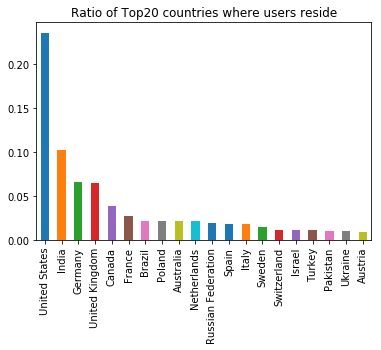

In [60]:
(country_vals[:20]/df.shape[0]).plot(kind="bar");
plt.title("Ratio of Top20 countries where users reside");

#### 2. Which languages do developers use and like?

In [7]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [8]:
def plot_ratio_language(df, ls_langs, title):
    study_df = total_count(df, 'language', 'count', ls_langs)
    study_df.set_index('language', inplace=True)
    plt.figure(figsize=(15,10))
    x = np.arange(len(study_df))
    y = (study_df/study_df.sum())['count'].values
    xlabel = study_df.index
    plt.bar(x, y)
    plt.xticks(x, xlabel)
    plt.xlabel('language')
    plt.ylabel('ratio')
    plt.title(title)
    plt.show()

In [9]:
df_dev_lang = df[['DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear']]
df_dev_lang = df_dev_lang.dropna(subset=['DevType'], how='any')
df_dev_lang.head()

,DevType,LanguageWorkedWith,LanguageDesireNextYear
1,"Developer, desktop or enterprise applications;...",C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL
2,"Designer;Developer, back-end;Developer, front-...",HTML/CSS,Elixir;HTML/CSS
3,"Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL
4,"Academic researcher;Developer, desktop or ente...",C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly
5,Data or business analyst;Data scientist or mac...,Java;R;SQL,Python;Scala;SQL


In [10]:
ls_langs = ["Java", "JavaScript", "Python", "Kotlin", "Go", "C", "C++", "C#", "Rust", "Swift", "TypeScript"]


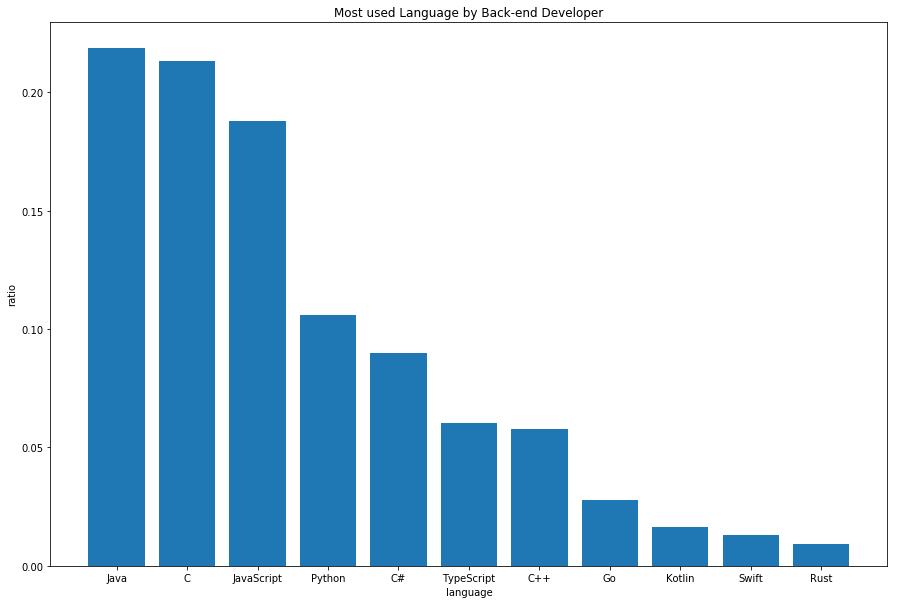

In [13]:
df_val_lang_back = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, back-end")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_back.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_back, ls_langs, 'Most used Language by Back-end Developer')


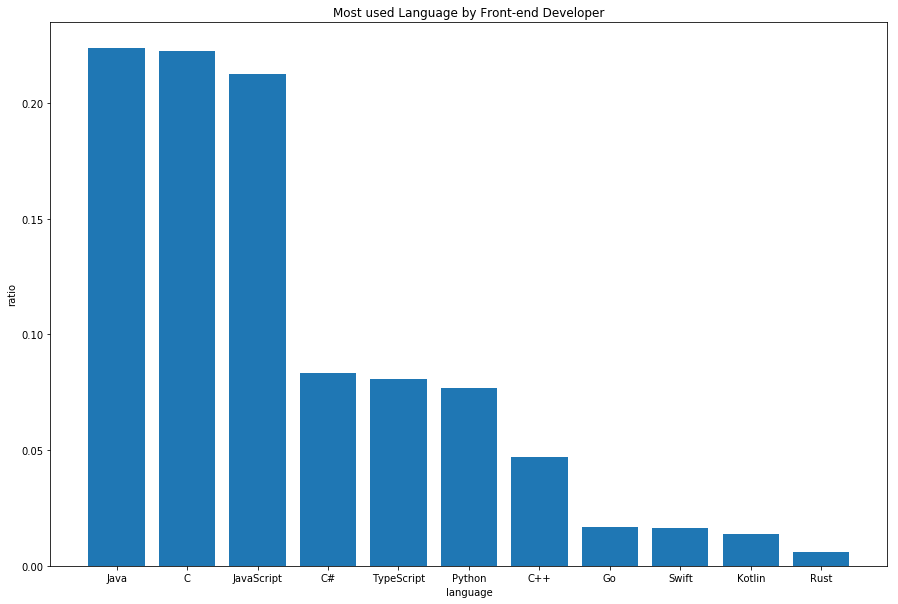

In [14]:
df_val_lang_front = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, front-end")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_front.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_front, ls_langs, 'Most used Language by Front-end Developer')


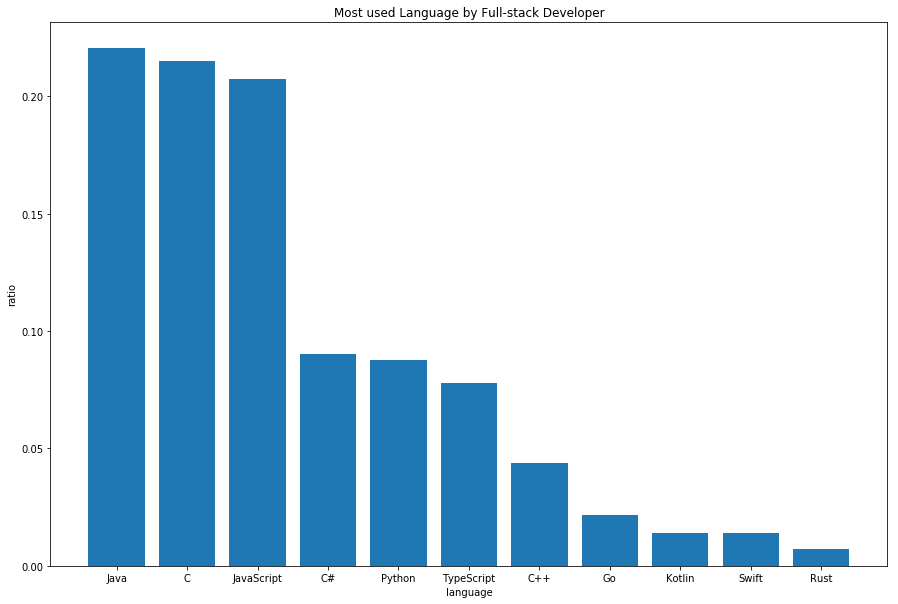

In [15]:
df_val_lang_full = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, full-stack")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_full.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_full, ls_langs, 'Most used Language by Full-stack Developer')


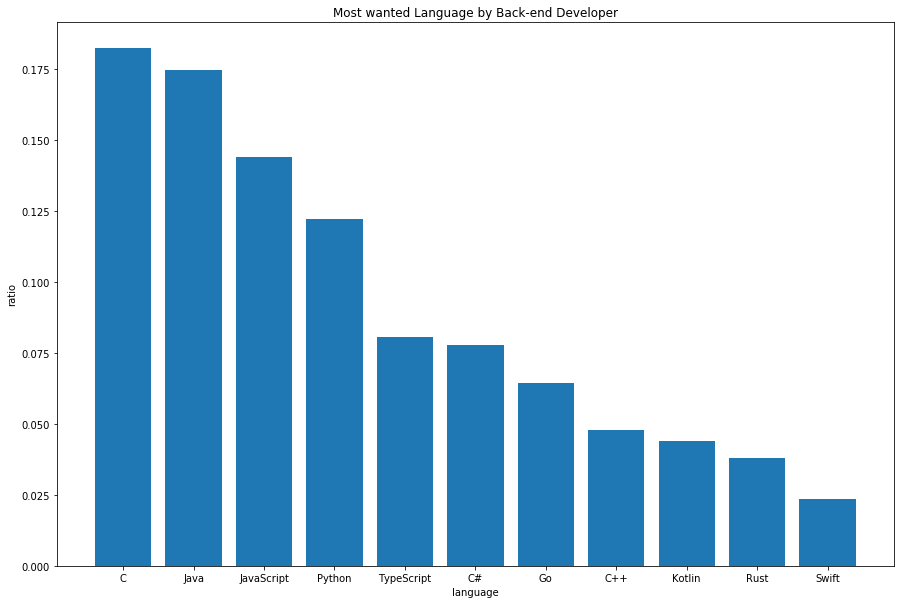

In [16]:
df_val_lang_back = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, back-end")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_back.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_back, ls_langs, 'Most wanted Language by Back-end Developer')


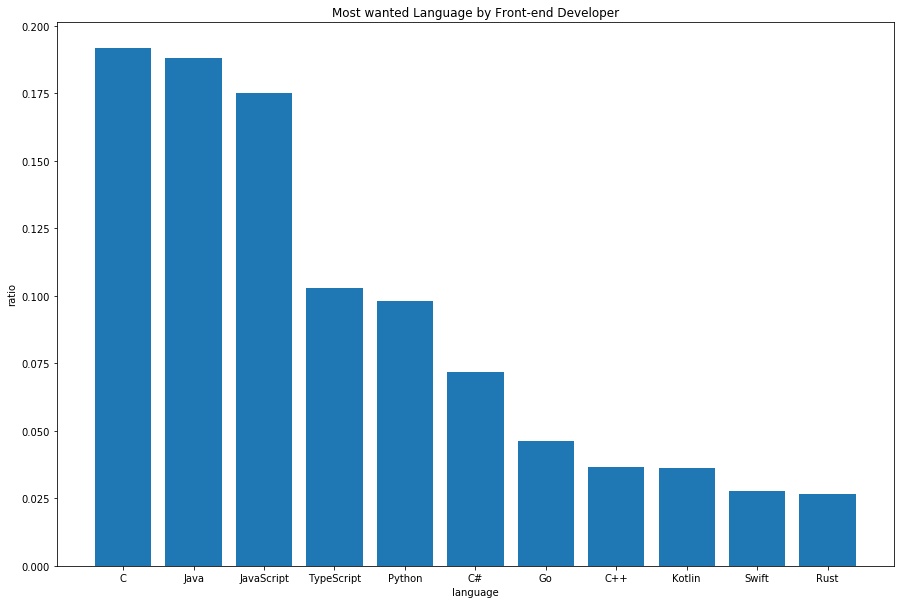

In [17]:
df_val_lang_front = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, front-end")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_front.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_front, ls_langs, 'Most wanted Language by Front-end Developer')


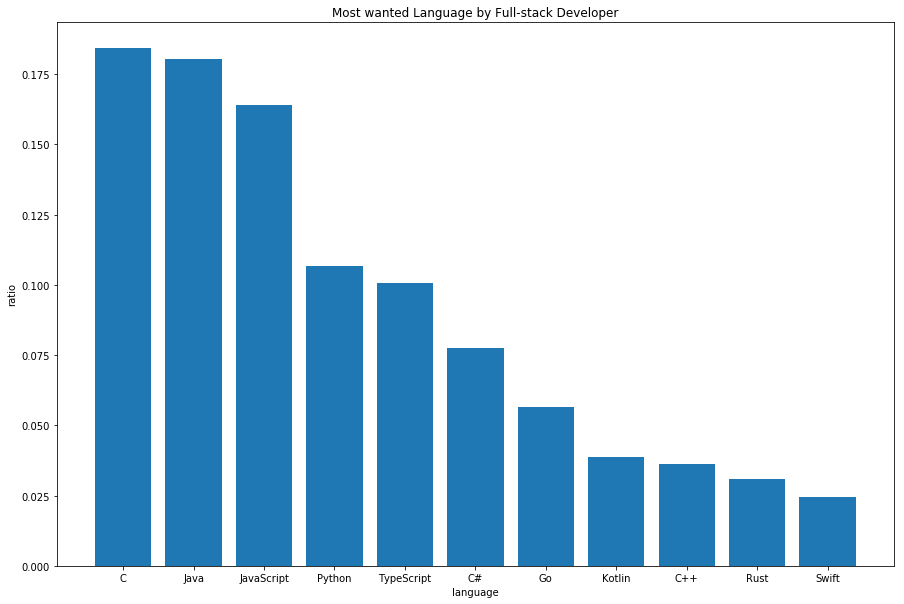

In [18]:
df_val_lang_full = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, full-stack")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_full.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
plot_ratio_language(df_val_lang_full, ls_langs, 'Most wanted Language by Full-stack Developer')


#### 3. What is the most important factor related with high compensation?

In [53]:
df_numeric = df[['ConvertedComp', 'Age', 'WorkWeekHrs', 'CodeRevHrs']]
df_numeric = df_numeric.dropna()

In [54]:
df_numeric_filter = df_numeric.loc[(df_numeric['Age'] < 70) & (df_numeric['Age'] > 10) & (df_numeric['CodeRevHrs'] < 40) & 
                                   (df_numeric['WorkWeekHrs'] < 80) & (df_numeric['ConvertedComp'] > 100) & (df_numeric['ConvertedComp'] < 200000)]

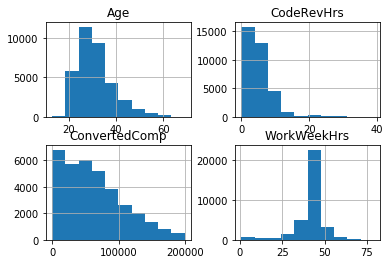

In [55]:
df_numeric_filter.hist();

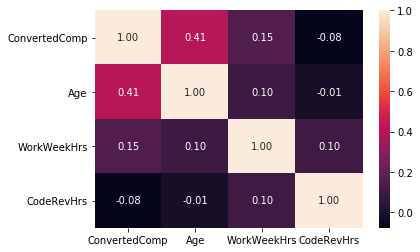

In [56]:
sns.heatmap(df_numeric_filter.corr(), annot=True, fmt=".2f");

In [57]:
#Split into explanatory and response variables
X = df_numeric_filter[['Age', 'WorkWeekHrs', 'CodeRevHrs']]
y = df_numeric_filter['ConvertedComp']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.18940993534933992 on 10496 values.'